In [8]:
import pandas as pd

In [9]:
raw_data_path =r"D:\ML_Projects\MLOps_California_House_Price_Prediction\housing\artifact\data_ingestion\2025-05-08-12-49-56\raw_data\housing.csv"

In [10]:
housing_data_frame = pd.read_csv(raw_data_path)
housing_data_frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

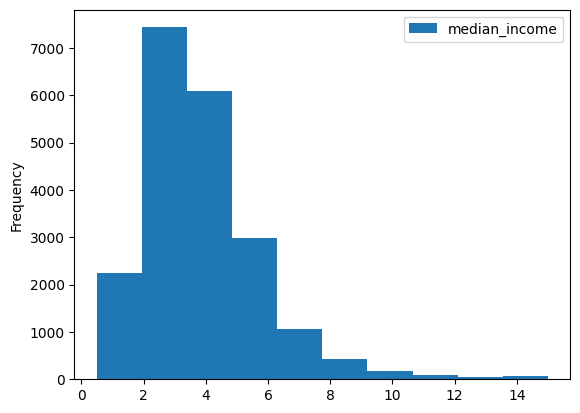

In [13]:
housing_data_frame[['median_income']].plot(kind='hist')

In [14]:
import numpy as np

In [15]:
# here we just creating "income_cat" column of with "5 Categories" based on "meadian_income" of people,
# once it created on this Categories itself we will perform "train_test_split",so where we can keep
# distribution of the "train" and "test" datasets similar/same


housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5])

In [16]:
housing_data_frame['income_cat'].unique()

[5, 4, 3, 2, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [17]:
housing_data_frame['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

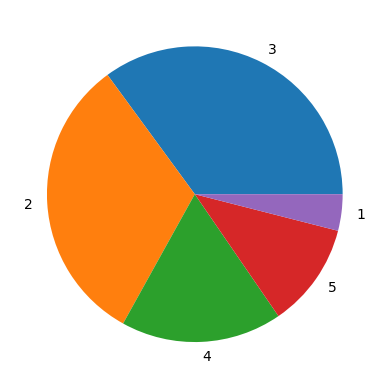

In [18]:
plt.pie(housing_data_frame.income_cat.value_counts(),labels=housing_data_frame.income_cat.value_counts().index)
plt.show()

# what we do is that based on people income we categorised like 5 categories

In [19]:
# why we are doing straitified split ?
# ans :-
#     when you train your model with the help of training dataset and we know training is the 
#     representation of Population dataset, so after training our model
#     we also need to perform test the model/evaluate with "test dataset", so it require that 
#     the distribution of "test dataset" is also similer to the trainig dataset 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [20]:
housing_data_frame.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5


In [21]:
for train_ix,test_ix in split.split(housing_data_frame, housing_data_frame["income_cat"]):
    print(train_ix,test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [22]:
len(train_ix)

16512

In [23]:
len(test_ix)

4128

In [24]:
train_df = housing_data_frame.iloc[train_ix]
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [25]:
test_df = housing_data_frame.iloc[test_ix]
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [26]:
train_df.shape

(16512, 11)

In [27]:
test_df.shape

(4128, 11)

In [28]:
housing_data_frame.shape

(20640, 11)

In [29]:
train_df.income_cat.value_counts()

income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64

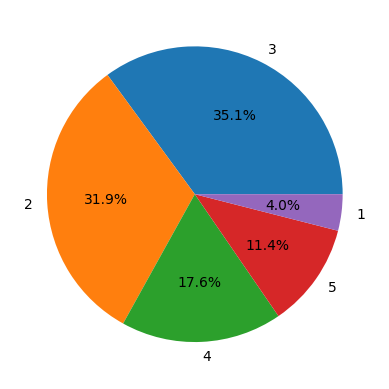

In [30]:
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index,autopct='%1.1f%%')
plt.show()

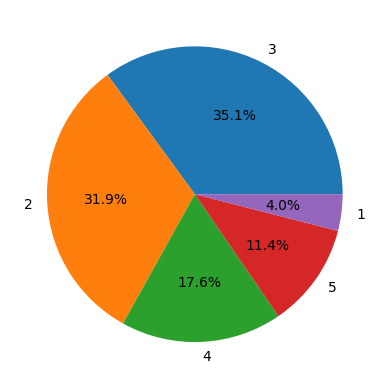

In [31]:
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index,autopct='%1.1f%%')
plt.show()

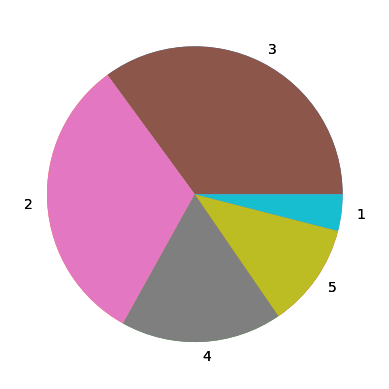

In [32]:
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index)
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index)

plt.show()

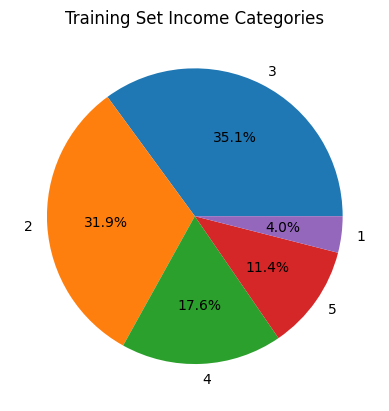

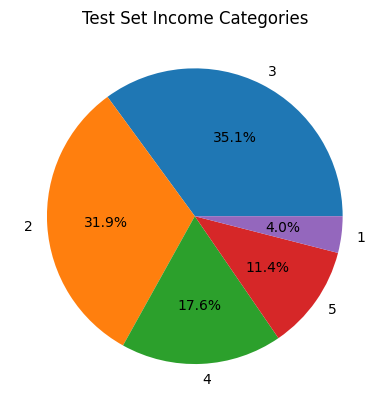

In [33]:
plt.figure(1)
plt.pie(train_df.income_cat.value_counts(), labels=train_df.income_cat.value_counts().index,autopct='%1.1f%%')
plt.title("Training Set Income Categories")

# Second pie chart
plt.figure(2)
plt.pie(test_df.income_cat.value_counts(), labels=test_df.income_cat.value_counts().index,autopct='%1.1f%%')
plt.title("Test Set Income Categories")

plt.show()

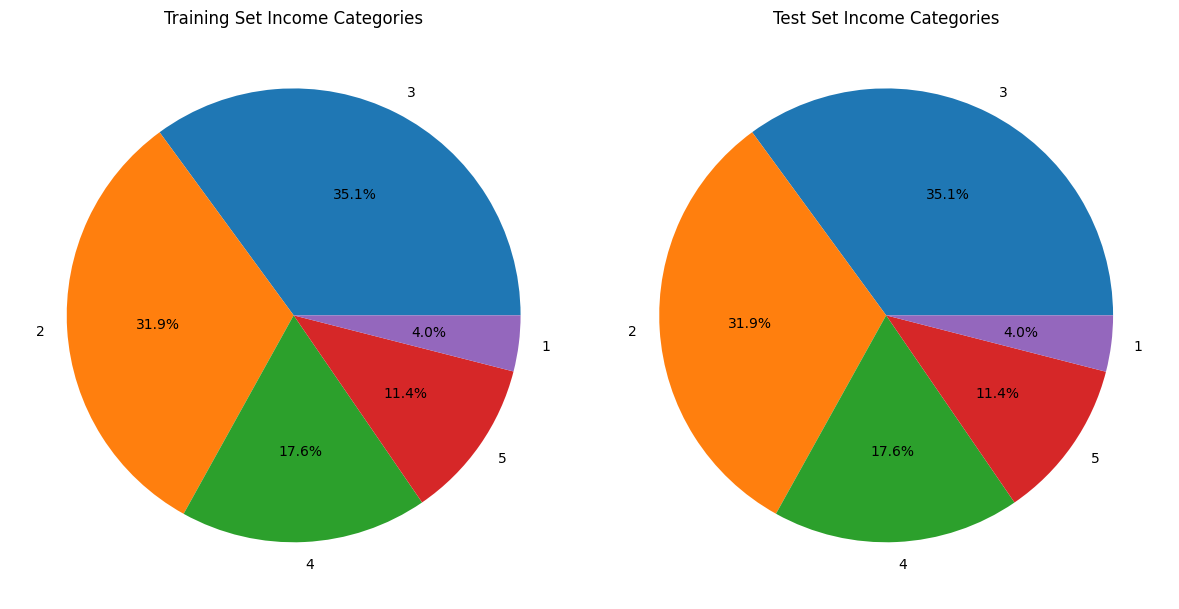

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First pie chart
axes[0].pie(train_df.income_cat.value_counts(), labels=train_df.income_cat.value_counts().index, autopct='%1.1f%%')
axes[0].set_title("Training Set Income Categories")

# Second pie chart
axes[1].pie(test_df.income_cat.value_counts(), labels=test_df.income_cat.value_counts().index, autopct='%1.1f%%')
axes[1].set_title("Test Set Income Categories")

plt.tight_layout()
plt.show()

In [35]:
strat_train_set = housing_data_frame.loc[train_ix].drop(["income_cat"],axis=1)

In [36]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [37]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [38]:
housing_data_frame.dtypes.index

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [39]:
housing_data_frame.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [40]:
housing_data_frame.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

In [41]:
housing_data_frame.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64)],
      dtype=object)

In [42]:
data_types = list(map(lambda x :str(x).replace("dtype('","").replace("')",""),housing_data_frame.dtypes.values))
data_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [43]:
columns = housing_data_frame.columns
columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [44]:
print("len(data_types) : ",len(data_types))
print("len(columns)    : ",len(columns))


len(data_types) :  11
len(columns)    :  11


In [45]:
list(zip(columns,data_types))

[('longitude', 'float64'),
 ('latitude', 'float64'),
 ('housing_median_age', 'float64'),
 ('total_rooms', 'float64'),
 ('total_bedrooms', 'float64'),
 ('population', 'float64'),
 ('households', 'float64'),
 ('median_income', 'float64'),
 ('median_house_value', 'float64'),
 ('ocean_proximity', 'object'),
 ('income_cat', 'category')]

In [46]:
tuple(zip(columns,data_types))

(('longitude', 'float64'),
 ('latitude', 'float64'),
 ('housing_median_age', 'float64'),
 ('total_rooms', 'float64'),
 ('total_bedrooms', 'float64'),
 ('population', 'float64'),
 ('households', 'float64'),
 ('median_income', 'float64'),
 ('median_house_value', 'float64'),
 ('ocean_proximity', 'object'),
 ('income_cat', 'category'))

In [47]:
dict(zip(columns,data_types))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}

one hat Encoding on Categorical column

In [53]:
housing_data_frame['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [55]:
# Domain Value check
housing_data_frame['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [56]:
len(housing_data_frame['ocean_proximity'].unique())

5

In [ ]:
pd.get_dummies(housing_data_frame['ocean_proximity'],drop_first=True)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
20635,True,False,False,False
20636,True,False,False,False
20637,True,False,False,False
20638,True,False,False,False


In [61]:
pd.get_dummies(housing_data_frame['ocean_proximity'],drop_first=True,dtype=int)


,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,1,0,0,0
20636,1,0,0,0
20637,1,0,0,0
20638,1,0,0,0


In [60]:
housing_data_encoded = pd.get_dummies(housing_data_frame, columns=['ocean_proximity'], dtype=int)

# Display the first few rows to confirm
print(housing_data_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value income_cat  \
0       322.0       126.0         8.3252            452600.0          5   
1      2401.0      1138.0         8.3014            358500.0          5   
2       496.0       177.0         7.2574            352100.0          5   
3       558.0       219.0         5.6431            341300.0          4   
4       565.0       259.0         3.8462            342200.0          3   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                 